In [30]:
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [31]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [32]:
(X_train_full, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [33]:
X_train_full.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [34]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [35]:
X_train, X_valid = X_train_full[5000:], X_train_full[:5000]

In [61]:
y_train, y_valid = y_train[5000:], y_train[:5000]

In [36]:
X_train.shape, X_valid.shape

((55000, 28, 28), (5000, 28, 28))

In [37]:
X_train[0].shape

(28, 28)

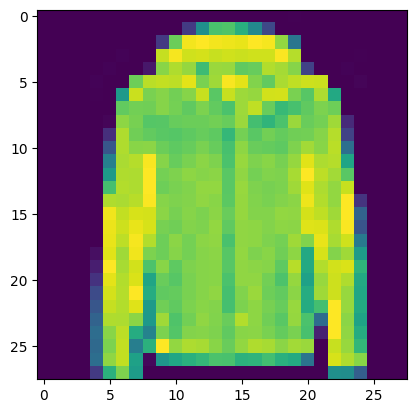

In [38]:
plt.imshow(X_train[0])

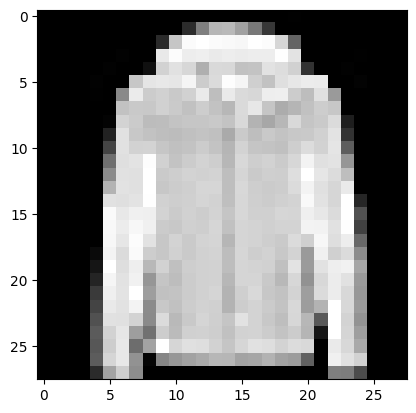

In [39]:
plt.imshow(X_train[0], cmap='gray')

In [40]:
y_train[0]

9

<Axes: >

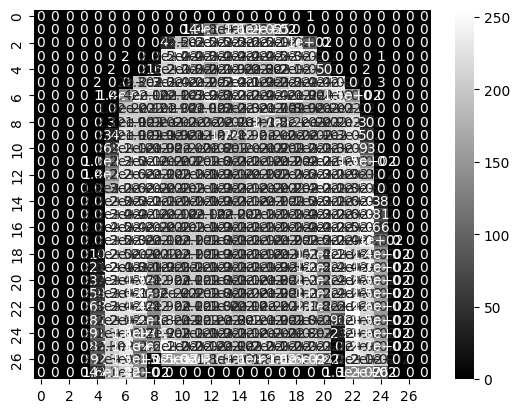

In [41]:
sns.heatmap(X_train[0], cmap='gray', annot=True)

In [47]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
X_valid= np.expand_dims(X_valid, -1)

In [50]:
X_train.shape, X_test.shape, X_valid.shape

((55000, 28, 28, 1), (10000, 28, 28, 1), (5000, 28, 28, 1))

In [53]:
X_train = X_train / 255
X_valid = X_valid / 255
X_test = X_test / 255

In [55]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [56]:
input_shape = (28,28,1)
CLASSES = 10

LAYERS = [
    tf.keras.layers.InputLayer(input_shape=input_shape),
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(CLASSES, activation='softmax')
]

In [57]:
CNN_model = tf.keras.Sequential(
    LAYERS
)

In [58]:
CNN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                16010     
Total params: 34,826
Trainable params: 34,826
Non-trainable params: 0
____________________________________________________

In [59]:
CNN_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='SGD',
    metrics=['accuracy']
)

In [62]:
history = CNN_model.fit(
    X_train,
    y_train,
    validation_data=(X_valid, y_valid),
    epochs = 10
)

Epoch 1/10
1719/1719 [==============================] - 20s 5ms/step - loss: 0.9446 - accuracy: 0.6742 - val_loss: 0.6128 - val_accuracy: 0.7714
Epoch 2/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5496 - accuracy: 0.8001 - val_loss: 0.5073 - val_accuracy: 0.8220
Epoch 3/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4760 - accuracy: 0.8286 - val_loss: 0.4630 - val_accuracy: 0.8388
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4377 - accuracy: 0.8435 - val_loss: 0.4092 - val_accuracy: 0.8554
Epoch 5/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4130 - accuracy: 0.8518 - val_loss: 0.4135 - val_accuracy: 0.8558
Epoch 6/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3943 - accuracy: 0.8602 - val_loss: 0.3795 - val_accuracy: 0.8700
Epoch 7/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3794 - accuracy: 0.8649 - val_loss: 0.3696 - val_accur

In [63]:
CNN_model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3649 - accuracy: 0.8724


[0.3649231195449829, 0.8723999857902527]

In [65]:
X_new = X_test[:3]

y_prob = CNN_model.predict(X_new)
y_prob.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.029, 0.   , 0.211, 0.008,
        0.753],
       [0.004, 0.   , 0.973, 0.   , 0.014, 0.   , 0.008, 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

In [66]:
Y_pred = np.argmax(y_prob, axis=-1)
Y_pred

array([9, 2, 1], dtype=int64)

In [67]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

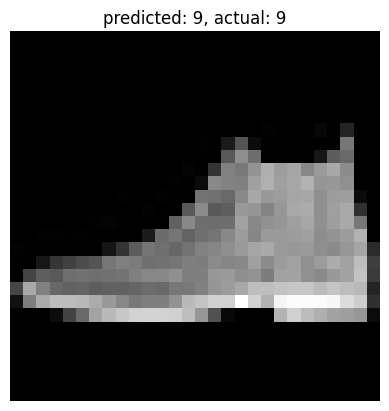

------------------------------------------------------------


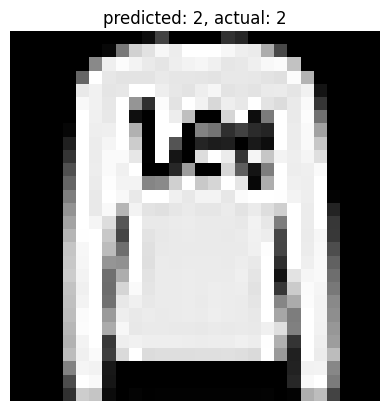

------------------------------------------------------------


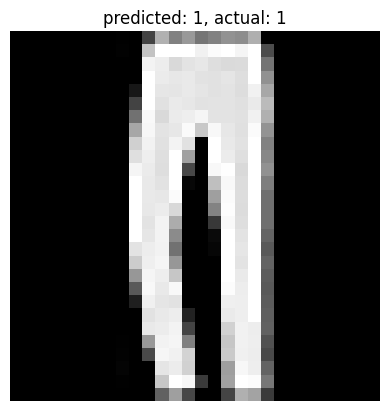

------------------------------------------------------------


In [68]:
for img_array, pred, actual in zip(X_new, Y_pred, y_test[:3]):
    plt.imshow(img_array, cmap="gray")
    plt.title(f"predicted: {pred}, actual: {actual}")
    plt.axis("off")
    plt.show()
    print("--"*30)

### Model -2


Let's try model with more layers and use max pool after every two convolutions

In [69]:
input_shape = (28,28,1)
CLASSES = 10

LAYERS = [
    tf.keras.layers.InputLayer(input_shape=input_shape),
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(CLASSES, activation='softmax')
]

In [70]:
CNN_model_1 = tf.keras.Sequential(
    LAYERS
)
CNN_model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 32)        18464     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)             

In [71]:
CNN_model_1.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='SGD',
    metrics=['accuracy']
)

In [72]:
history = CNN_model_1.fit(
    X_train,
    y_train,
    validation_data=(X_valid, y_valid),
    epochs = 10
)

Epoch 1/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.8997 - accuracy: 0.6795 - val_loss: 0.5756 - val_accuracy: 0.7966
Epoch 2/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5041 - accuracy: 0.8165 - val_loss: 0.4539 - val_accuracy: 0.8360
Epoch 3/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4375 - accuracy: 0.8426 - val_loss: 0.4041 - val_accuracy: 0.8614
Epoch 4/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4014 - accuracy: 0.8558 - val_loss: 0.3756 - val_accuracy: 0.8682
Epoch 5/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3750 - accuracy: 0.8663 - val_loss: 0.3816 - val_accuracy: 0.8676
Epoch 6/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3557 - accuracy: 0.8737 - val_loss: 0.3664 - val_accuracy: 0.8750
Epoch 7/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3397 - accuracy: 0.8779 - val_loss: 0.3466 - val_accu

In [73]:
CNN_model_1.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3479 - accuracy: 0.8769


[0.3479261100292206, 0.8769000172615051]

### Model 3

In [76]:
input_shape = (28,28,1)
CLASSES = 10

LAYERS = [
    tf.keras.layers.InputLayer(input_shape=input_shape),
    tf.keras.layers.Conv2D(64,kernel_size=(3,3), activation='relu'),
    tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(CLASSES, activation='softmax')
]

In [77]:
CNN_model_2 = tf.keras.Sequential(
    LAYERS
)
CNN_model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 64)        73792     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)             

In [78]:
CNN_model_2.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='SGD',
    metrics=['accuracy']
)

In [79]:
history = CNN_model_2.fit(
    X_train,
    y_train,
    validation_data=(X_valid, y_valid),
    epochs = 10
)

Epoch 1/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.8740 - accuracy: 0.6933 - val_loss: 0.5205 - val_accuracy: 0.8126
Epoch 2/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4996 - accuracy: 0.8191 - val_loss: 0.4443 - val_accuracy: 0.8414
Epoch 3/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.4355 - accuracy: 0.8445 - val_loss: 0.3947 - val_accuracy: 0.8668
Epoch 4/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.3990 - accuracy: 0.8567 - val_loss: 0.3702 - val_accuracy: 0.8726
Epoch 5/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.3716 - accuracy: 0.8669 - val_loss: 0.3484 - val_accuracy: 0.8774
Epoch 6/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.3502 - accuracy: 0.8736 - val_loss: 0.3855 - val_accuracy: 0.8544
Epoch 7/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.3339 - accuracy: 0.8799 - val_loss: 0.3383 - val_ac

### Model 4

In [80]:
input_shape = (28,28,1)
CLASSES = 10

LAYERS = [
    tf.keras.layers.InputLayer(input_shape=input_shape),
    tf.keras.layers.Conv2D(64,kernel_size=(3,3), activation='relu'),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.Conv2D(64,kernel_size=(1,1), activation='relu'),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.Conv2D(64,kernel_size=(1,1), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(CLASSES, activation='softmax')
]

In [81]:
CNN_model_3 = tf.keras.Sequential(
    LAYERS
)
CNN_model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 64)        36928     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 24, 24, 64)        4160      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 22, 22, 64)        36928     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 20, 20, 64)        36928     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 20, 20, 64)        4160      
_________________________________________________________________
flatten_3 (Flatten)          (None, 25600)            

In [82]:
CNN_model_3.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='SGD',
    metrics=['accuracy']
)

In [83]:
history = CNN_model_3.fit(
    X_train,
    y_train,
    validation_data=(X_valid, y_valid),
    epochs = 10
)

Epoch 1/10
1719/1719 [==============================] - 16s 9ms/step - loss: 0.7549 - accuracy: 0.7278 - val_loss: 0.5542 - val_accuracy: 0.7840
Epoch 2/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.4574 - accuracy: 0.8362 - val_loss: 0.4299 - val_accuracy: 0.8470
Epoch 3/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3832 - accuracy: 0.8628 - val_loss: 0.3995 - val_accuracy: 0.8544
Epoch 4/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3408 - accuracy: 0.8779 - val_loss: 0.3261 - val_accuracy: 0.8884
Epoch 5/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3116 - accuracy: 0.8879 - val_loss: 0.2987 - val_accuracy: 0.8926
Epoch 6/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.2894 - accuracy: 0.8961 - val_loss: 0.3069 - val_accuracy: 0.8944
Epoch 7/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.2707 - accuracy: 0.9024 - val_loss: 0.2965 - val_ac